<a href="https://colab.research.google.com/github/justanicon1/human-activity-recognition/blob/main/HAR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name**: Michael Vincent Udousoro

**ID**: UDO22615049

**Github Link**:  https://github.com/michaeludou/human-activity-recognition

**Web App Demo (Youtube Link)**: https://www.youtube.com/watch?v=VAujHg1Vhl8


**Project Code Exp. and Analysis (Youtube Link)** https://www.youtube.com/watch?v=8yjcfrsDsxk&feature=youtu.be&cbrd=1


## About this Project
In this project, i focused on building a robust human activity recognition (HAR) system using tri-axial accelerometer data, combined with a fully functional web-based application. The dataset included x_axis, y_axis, and z_axis sensor readings alongside labeled activities such as Walking, Running, Sitting, Standing, and Laying.

The workflow began with preprocessing steps including label encoding, standardization of sensor inputs, and one-hot encoding of activity labels. Exploratory Data Analysis (EDA) was performed using t-SNE and PCA to visualize the separability of different activity classes in reduced dimensions. The input data was reshaped to suit sequential models, with each sample structured as a 3D input for temporal learning.

### Two deep learning architectures were designed and trained:
-> A RNN with dropout and dense layers

-> A more powerful Bidirectional LSTM, capable of learning dependencies in both temporal directions

Hyperparameters such as learning rate (0.001), dropout rates, batch size (32), and early stopping (patience = 5) were tuned to optimize performance.

## Flask App Deployment
I also developed and customized a Flask-based web application that allows users to:

-> Send accelerometer sensor data (in real time or batch)

Get predictions on the detected activity

-> Receive detailed metrics including prediction confidence, signal quality, and pattern matching

-> The app integrates a trained deep learning model includes robust error handling, logging, model loading, and prediction feedback. The application was extended with confidence calibration, activity pattern scoring, and advanced preprocessing techniques for improved interpretability.

## Tools & Technologies Used:

-> Python, NumPy, Pandas, Matplotlib, Seaborn – Data handling & visualization

-> TensorFlow / Keras Deep learning models

-> Scikit-learn:  Preprocessing, evaluation metrics, t-SNA

## For Web App:

#### -> Backend:

*   Flask Web app backend for model deployment
*   Python
*   NumPy
*   Scikit-learn (for preprocessing)

#### -> Frontend:

* HTML5
* CSS3
* JavaScript
* Bootstrap 5.1.3
* Font Awesome 6.0.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load and Explore the Dataset

In [ ]:
# Load the dataset
import pandas as pd

df = pd.read_csv('/content/har_dataset.csv')
df.head()


,sample_id,activity,timestamp,x_axis,y_axis,z_axis
0,0,Walking,0,-0.044725,9.193854,-1.757212
1,0,Walking,1,0.082906,6.525613,-2.999159
2,0,Walking,2,0.747356,10.226328,-0.866485
3,0,Walking,3,0.300750,8.008787,-2.532047
4,0,Walking,4,0.355026,11.538070,-1.090931


#Data Preprocessing


In [ ]:
# EDA 1: Dataset shape, info, and basic checks
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Dataset shape: (25000, 6)

Data types:
 sample_id      int64
activity      object
timestamp      int64
x_axis       float64
y_axis       float64
z_axis       float64
dtype: object

Missing values:
 sample_id    0
activity     0
timestamp    0
x_axis       0
y_axis       0
z_axis       0
dtype: int64


In [ ]:
print(df.columns)


Index(['sample_id', 'activity', 'timestamp', 'x_axis', 'y_axis', 'z_axis'], dtype='object')


In [ ]:
# EDA 3: Summary statistics
df.describe()


,sample_id,timestamp,x_axis,y_axis,z_axis
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,499.500000,2.000000,0.160405,7.476758,2.939466
std,288.680764,1.414242,0.331633,6.199704,5.638942
min,0.000000,0.000000,-1.036416,0.000047,-3.999688
25%,249.750000,1.000000,-0.013328,0.870978,-2.163496
50%,499.500000,2.000000,0.014084,9.701900,0.007442
75%,749.250000,3.000000,0.266457,11.548824,9.710299
max,999.000000,4.000000,1.961309,20.989192,9.899860


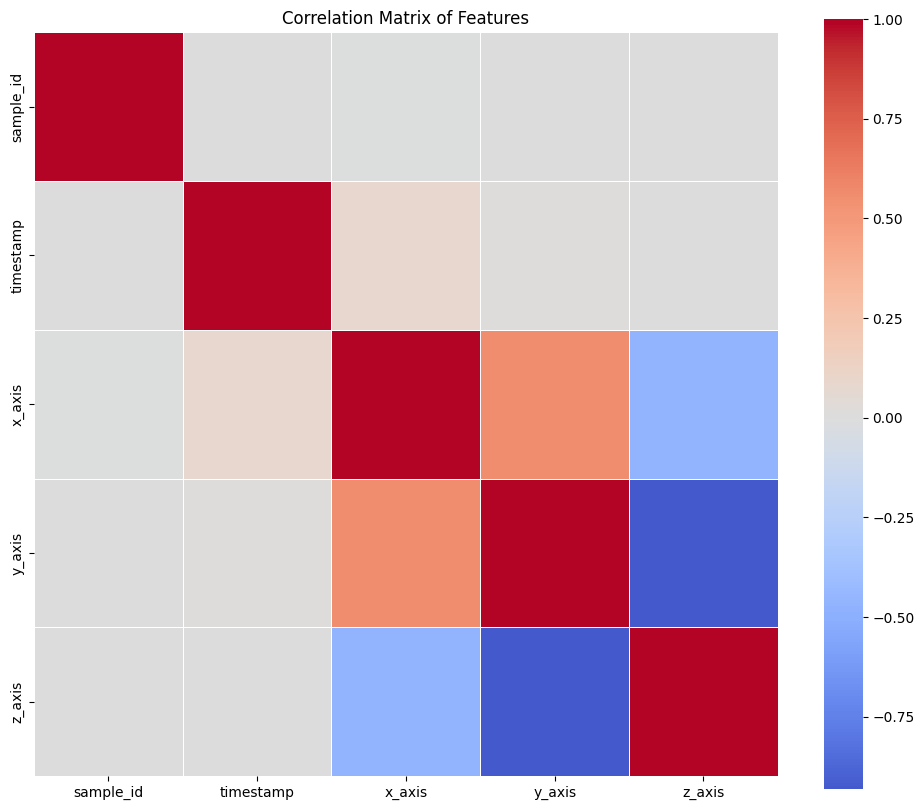

In [ ]:
# EDA 4: Correlation heatmap (without 'Activity')
plt.figure(figsize=(12, 10))
corr_matrix = df.drop('activity', axis=1).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


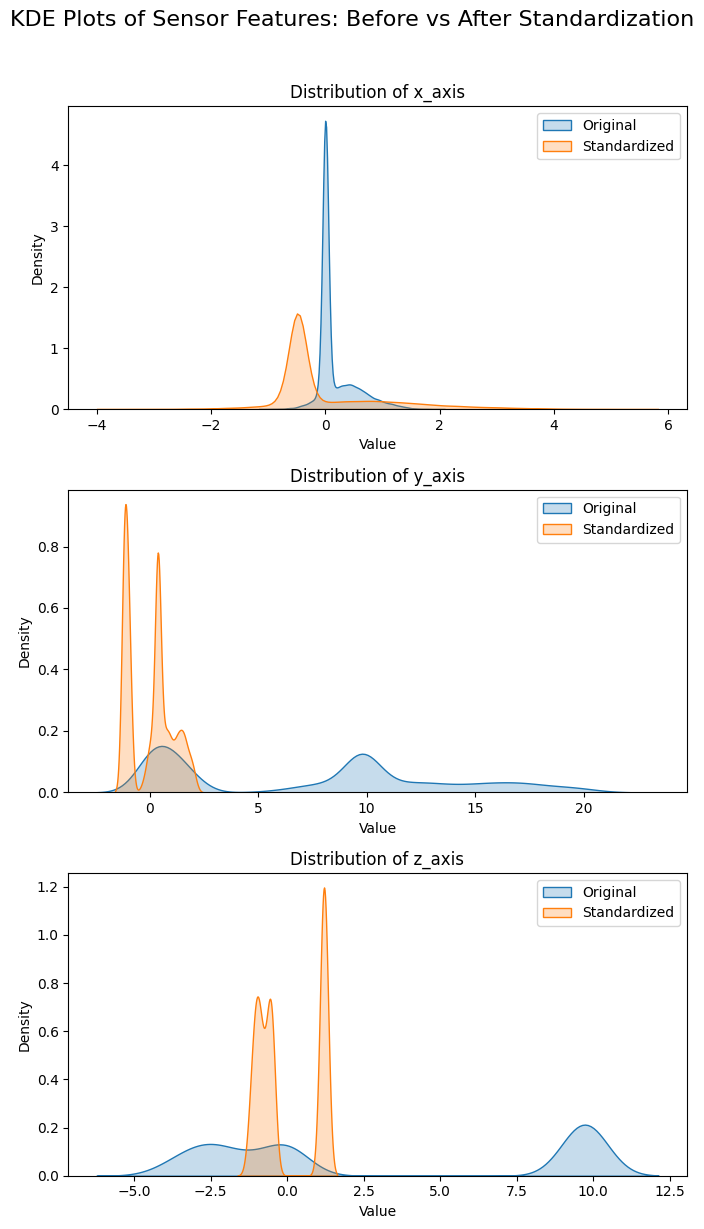

In [ ]:
plt.figure(figsize=(7, 12))  # Taller figure for vertical layout

for i, axis in enumerate(features):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(df[axis], label='Original', fill=True)
    sns.kdeplot(df_scaled[axis], label='Standardized', fill=True)
    plt.title(f'Distribution of {axis}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

plt.suptitle('KDE Plots of Sensor Features: Before vs After Standardization', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


# Encode the activity labels (e.g., 'Walking') into integers (e.g., 0, 1, 2...)
Machine learning models work best with numerical targets.

Each unique activity is mapped to an integer label (e.g., 'Walking' → 0, 'Running' → 1).

In [ ]:
# Step 2: Encode activity labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['activity'] = le.fit_transform(df['activity'])
ACTIVITIES = list(le.classes_)  # Save class names
print("Encoded labels:", ACTIVITIES)

Encoded labels: ['Laying', 'Running', 'Sitting', 'Standing', 'Walking']


In [ ]:
# Step 3: Select features and target
X = df[['x_axis', 'y_axis']]  # Add 'z_axis' if available
y = df['activity']


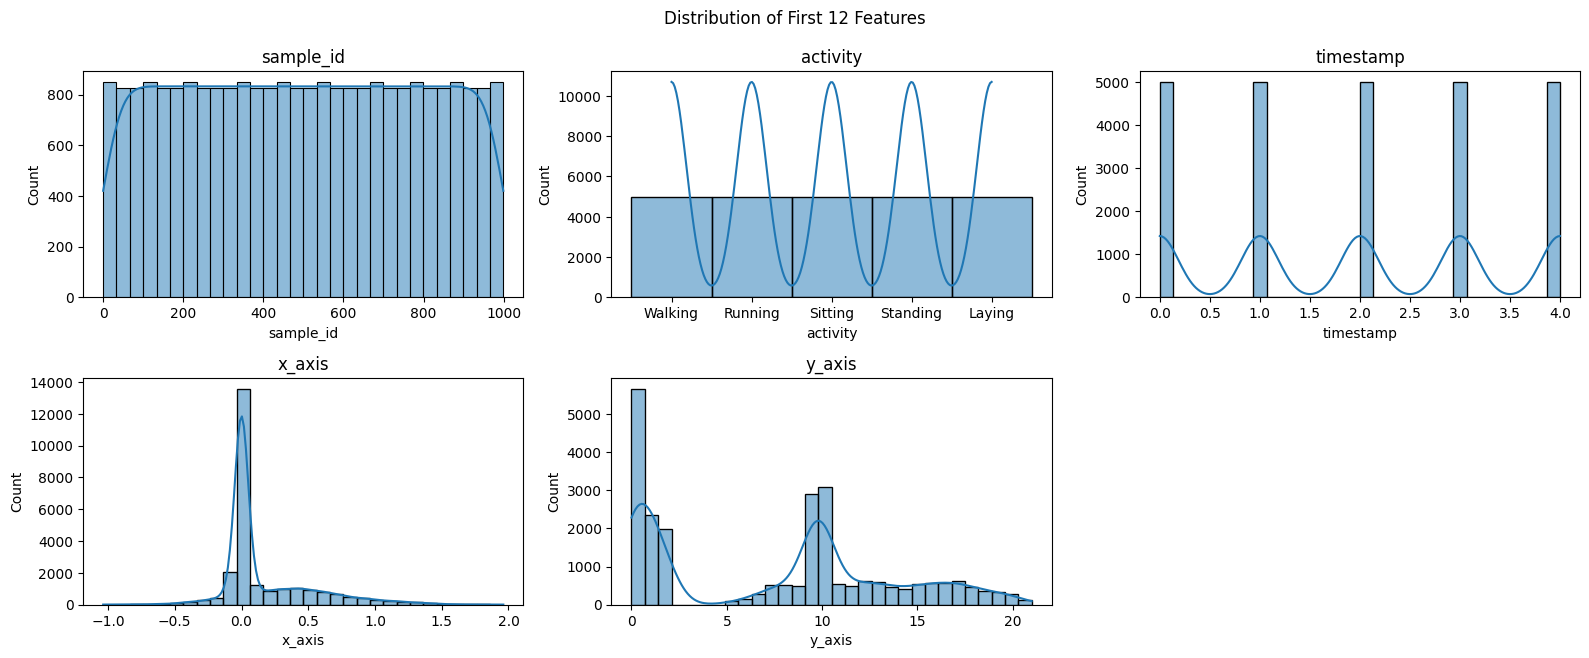

In [ ]:
#  Feature distribution plots (first 12 features)
feature_cols = df.columns[:-1]  # All columns except 'Activity'

plt.figure(figsize=(16, 12))
for i, col in enumerate(feature_cols[:12]):  # Show only first 12 for readability
    plt.subplot(4, 3, i+1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()
plt.suptitle("Distribution of First 12 Features", y=1.02)
plt.show()


In [ ]:
# Step 4: Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Select input features and labels
t-SNE is applied to feature data to reduce it to 2D for visualization

We apply t-SNE (t-distributed Stochastic Neighbor Embedding) to reduce the dataset to 2 dimensions for visual clustering analysis. t-SNE helps in understanding how separable the activity classes are in feature space. Here, we select raw sensor inputs (accelerometer readings) as features. These are continuous numeric variables that capture physical motion, which t-SNE can cluster based on patterns.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


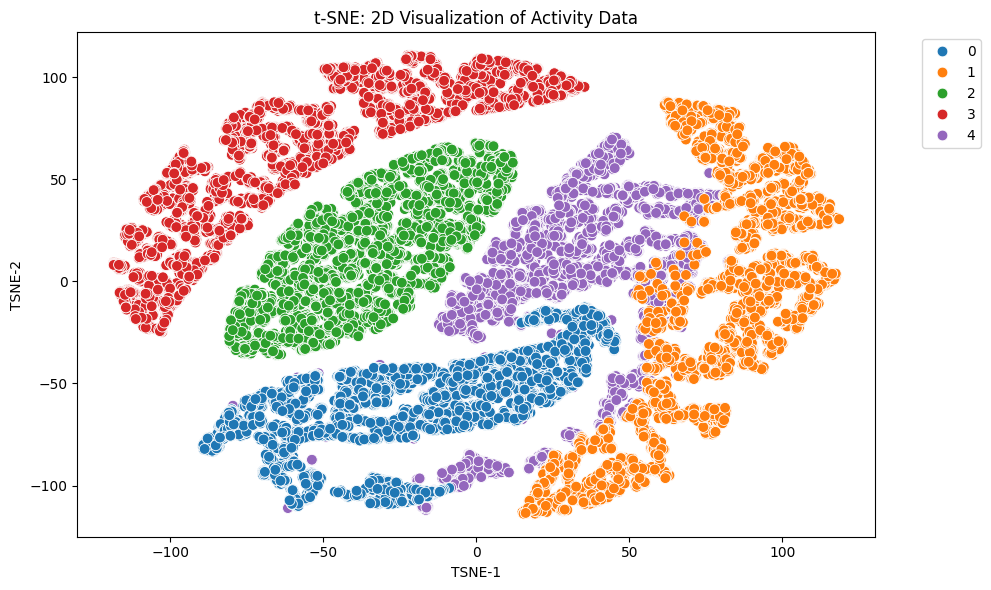

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare features and labels
features = ['x_axis', 'y_axis']
X = df[features]
y = df['activity']

# Step 2: Scale features (important for t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Step 4: Build a new DataFrame for plotting
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE-1', 'TSNE-2'])
tsne_df['Activity'] = y

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE-1', y='TSNE-2', hue='Activity', palette='tab10', s=60)
plt.title('t-SNE: 2D Visualization of Activity Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### This converts your class labels from integers (e.g., 0, 1, 2, 3, 4) into binary vectors.

In [ ]:
#One-hot encode labels (after t-SNE is done)
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y)


20% of data is used for testing, 80% for training.

random_state=42 → ensures the same split happens every time (for reproducibility).



In [ ]:
# Step 6: Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random


## RNNs expect input in the format: (samples, time_steps, features)
#### - samples  = number of training examples
#### - time_steps = number of steps per sequence (we're using 1 here)
#### - features = number of input features per time step (e.g., x, y, z)

In [ ]:
# Reshape input for RNN: (samples, time_steps, features)
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("New input shape for RNN:", X_train_rnn.shape)


New input shape for RNN: (20000, 1, 2)


This model uses:
- A single SimpleRNN layer to process short time-step inputs
- Dropout and Dense layers to enhance learning and reduce overfitting
- A softmax output layer for multi-class classification

The architecture is simple yet effective for time-series based activity recognition.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 64)                  │           4,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,533 (25.52 KB)

 Trainable params: 6,533 (25.52 KB)

 Non-trainable params: 0 (0.00 B)

The model is learning very well and generalizing strongly to the validation set whcih shows no major signs of overfitting!

In [ ]:
history = model.fit(
    X_train_rnn, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6061 - loss: 0.9356 - val_accuracy: 0.8690 - val_loss: 0.3529
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8625 - loss: 0.3476 - val_accuracy: 0.9218 - val_loss: 0.2223
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9200 - loss: 0.2358 - val_accuracy: 0.9715 - val_loss: 0.1584
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9519 - loss: 0.1624 - val_accuracy: 0.9785 - val_loss: 0.1280
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9604 - loss: 0.1317 - val_accuracy: 0.9712 - val_loss: 0.0962
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9633 - loss: 0.1180 - val_accuracy: 0.9750 - val_loss: 0.0793
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9659 - loss: 0.1050 - val_accuracy: 0.9772 - val_loss: 0.0709
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9693 - loss: 0.0922 - val_accuracy: 

In [ ]:
loss, accuracy = model.evaluate(X_test_rnn, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9871 - loss: 0.0322
Test Accuracy: 0.9876


-> The result shows initial Loss drops steeply at first, then flattens out.

-> Validation loss stays consistently lower than training loss → possibly better regularization and generalization

-> Curves are smooth and well-aligned → model is stable

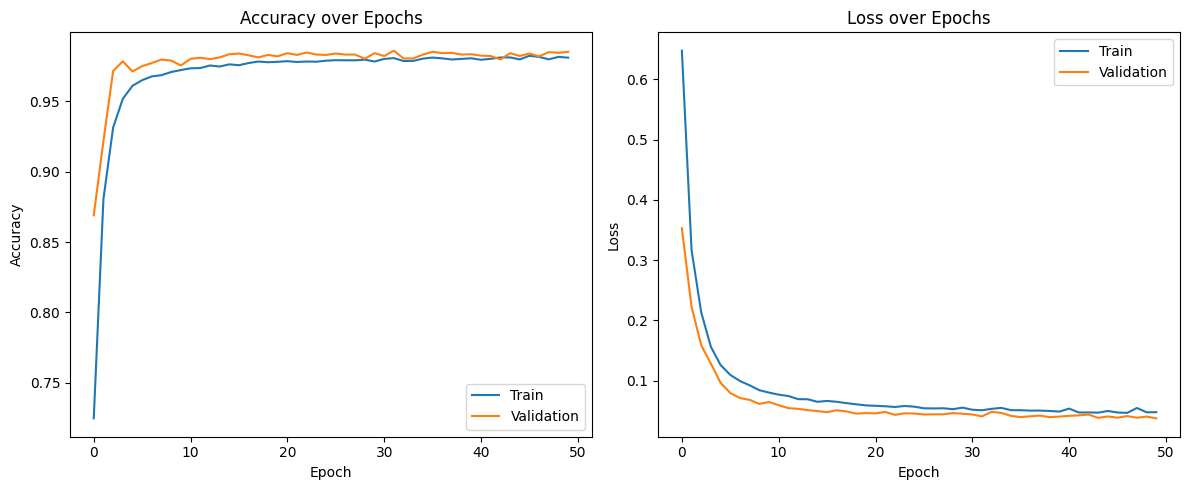

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Step 5: Reshape for LSTM input
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # (samples, 1, 5)
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))      # (samples, 1, 5)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional)      │ (None, 128)                 │          35,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,133 (156.77 KB)

 Trainable params: 40,133 (156.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 132ms/step - accuracy: 0.5549 - loss: 1.0289 - val_accuracy: 0.8307 - val_loss: 0.3713
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8184 - loss: 0.3780 - val_accuracy: 0.9570 - val_loss: 0.2121
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9058 - loss: 0.2401 - val_accuracy: 0.9595 - val_loss: 0.1097
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9489 - loss: 0.1433 - val_accuracy: 0.9578 - val_loss: 0.0930
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9641 - loss: 0.1047 - val_accuracy: 0.9887 - val_loss: 0.0467
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9726 - loss: 0.0778 - val_accuracy: 0.9843 - val_loss: 0.0392
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9781 - loss: 0.0621 - val_accuracy: 0.9872 - val_loss: 0.0320
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9771 - loss: 0.0631 - val_accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test_lstm, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0233
Test Accuracy: 0.9918


In our case, Bidirectional LSTM outperforms RNN slightly — especially on validation loss and class separability.

This is expected because Bidirectional LSTM learns temporal dependencies in both directions, making it more powerful for sequences like sensor data.

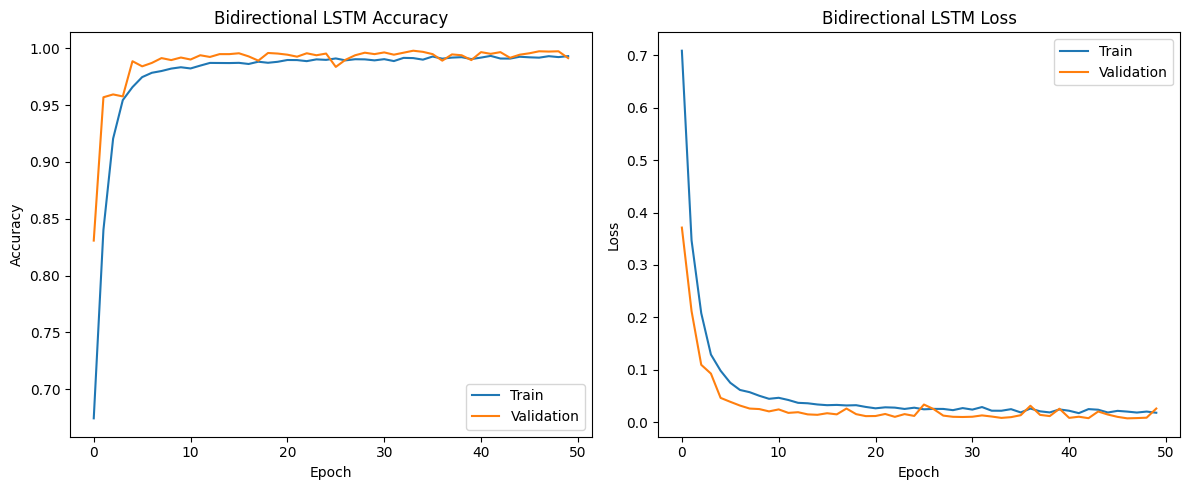

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Bidirectional LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Bidirectional LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#RNN with EarlyStopping and Manual Tuning
The Simple RNN model was tuned using essential hyperparameters including 64 RNN units, a dropout rate of 0.3 to prevent overfitting, a learning rate of 0.001 with the Adam optimizer, and a batch size of 32 over a maximum of 50 epochs. Early stopping was applied with a patience of 5 epochs, monitoring validation loss to halt training once performance stopped improving, and to restore the best weights. These tuning choices ensured a balance between learning capacity and generalization, allowing the model to converge efficiently while avoiding overfitting. The training and validation performance were tracked using rnn_history for further analysis and visualization.










In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Set your hyperparameters
rnn_units = 64
dropout_rate = 0.3
learning_rate = 0.001
batch_size = 32
epochs = 50

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Build RNN
rnn_model = Sequential()
rnn_model.add(SimpleRNN(rnn_units, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=False))
rnn_model.add(Dropout(dropout_rate))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(y_train.shape[1], activation='softmax'))

rnn_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

rnn_history = rnn_model.fit(
    X_train_rnn, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5821 - loss: 0.9651 - val_accuracy: 0.8490 - val_loss: 0.3859
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8391 - loss: 0.3886 - val_accuracy: 0.9202 - val_loss: 0.2537
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8982 - loss: 0.2783 - val_accuracy: 0.9563 - val_loss: 0.1748
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9420 - loss: 0.1923 - val_accuracy: 0.9467 - val_loss: 0.1364
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9546 - loss: 0.1458 - val_accuracy: 0.9617 - val_loss: 0.1055
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9617 - loss: 0.1236 - val_accuracy: 0.9730 - val_loss: 0.0882
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9673 - loss: 0.1063 - val_accuracy: 0.9755 - val_loss: 0.0761
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9650 - loss: 0.1020 - val_accuracy: 0.

# Bidirectional LSTM with EarlyStopping and Manual Tuning

The Bidirectional LSTM model was tuned using 64 LSTM units to capture temporal dependencies in both forward and backward directions, with a dropout rate of 0.3 for the main recurrent layer and 0.2 after the dense layer to reduce overfitting. The model used the Adam optimizer with a learning rate of 0.001, a batch size of 32, and trained for up to 50 epochs. Early stopping was implemented with a patience of 5 epochs, monitoring validation loss to ensure optimal generalization by halting training when improvement plateaued and restoring the best weights. This tuning configuration enabled the model to achieve high performance with strong generalization, especially suited for sequential classification tasks like human activity recognition.

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional

# Hyperparameters
lstm_units = 64
dropout_rate = 0.3
learning_rate = 0.001
batch_size = 32
epochs = 50

early_stop_lstm = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Build Bidirectional LSTM
lstm_model = Sequential()
lstm_model.add(Bidirectional(LSTM(lstm_units, return_sequences=False), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(dropout_rate))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(y_train.shape[1], activation='softmax'))

lstm_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

lstm_history = lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stop_lstm],
    verbose=1
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5522 - loss: 1.0069 - val_accuracy: 0.8910 - val_loss: 0.3642
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8116 - loss: 0.3826 - val_accuracy: 0.9538 - val_loss: 0.2233
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9087 - loss: 0.2398 - val_accuracy: 0.9575 - val_loss: 0.1150
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9516 - loss: 0.1420 - val_accuracy: 0.9795 - val_loss: 0.0724
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9621 - loss: 0.1053 - val_accuracy: 0.9753 - val_loss: 0.0594
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9694 - loss: 0.0800 - val_accuracy: 0.9898 - val_loss: 0.0370
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9771 - loss: 0.0670 - val_accuracy: 0.9830 - val_loss: 0.0390
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9781 - loss: 0.0639 - val_accuracy: 0.

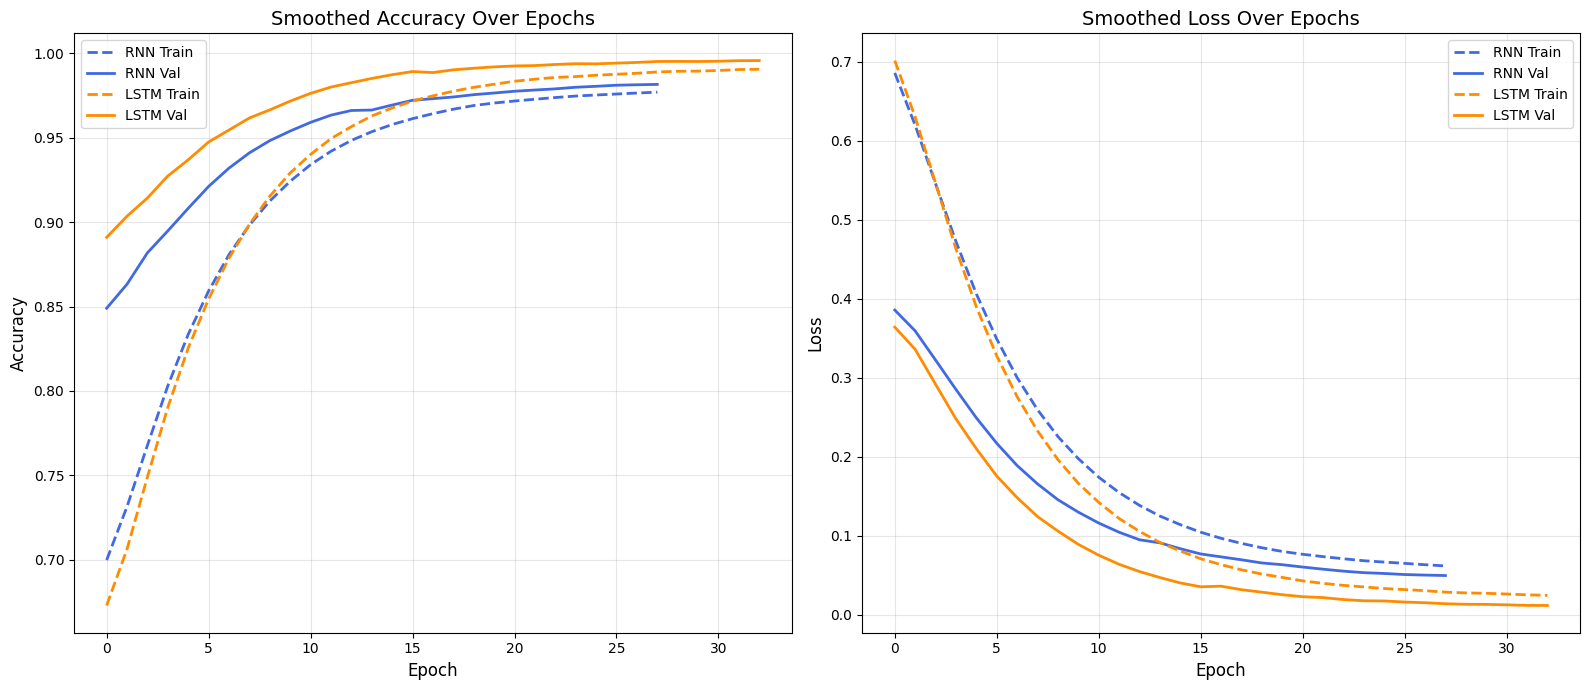

In [ ]:
import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.8):
    """Exponential moving average smoothing"""
    smoothed = []
    for point in points:
        if smoothed:
            smoothed.append(smoothed[-1] * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

# Smooth training & validation metrics
rnn_train_acc = smooth_curve(rnn_history.history['accuracy'])
rnn_val_acc = smooth_curve(rnn_history.history['val_accuracy'])
rnn_train_loss = smooth_curve(rnn_history.history['loss'])
rnn_val_loss = smooth_curve(rnn_history.history['val_loss'])

lstm_train_acc = smooth_curve(lstm_history.history['accuracy'])
lstm_val_acc = smooth_curve(lstm_history.history['val_accuracy'])
lstm_train_loss = smooth_curve(lstm_history.history['loss'])
lstm_val_loss = smooth_curve(lstm_history.history['val_loss'])

# Plot
plt.figure(figsize=(16, 7))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(rnn_train_acc, label='RNN Train', linestyle='--', color='royalblue', linewidth=2)
plt.plot(rnn_val_acc, label='RNN Val', linestyle='-', color='royalblue', linewidth=2)

plt.plot(lstm_train_acc, label='LSTM Train', linestyle='--', color='darkorange', linewidth=2)
plt.plot(lstm_val_acc, label='LSTM Val', linestyle='-', color='darkorange', linewidth=2)

plt.title('Smoothed Accuracy Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(rnn_train_loss, label='RNN Train', linestyle='--', color='royalblue', linewidth=2)
plt.plot(rnn_val_loss, label='RNN Val', linestyle='-', color='royalblue', linewidth=2)

plt.plot(lstm_train_loss, label='LSTM Train', linestyle='--', color='darkorange', linewidth=2)
plt.plot(lstm_val_loss, label='LSTM Val', linestyle='-', color='darkorange', linewidth=2)

plt.title('Smoothed Loss Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predictions for RNN
y_pred_rnn = rnn_model.predict(X_test_rnn)
y_pred_classes_rnn = np.argmax(y_pred_rnn, axis=1)
y_true_classes_rnn = np.argmax(y_test, axis=1)

print("🟦 RNN Classification Report")
print(classification_report(y_true_classes_rnn, y_pred_classes_rnn))


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
🟦 RNN Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1005
           1       0.96      0.98      0.97      1000
           2       1.00      1.00      1.00       985
           3       1.00      1.00      1.00       989
           4       0.98      0.95      0.96      1021

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [ ]:
#convert class labels to strings for display
target_names = [str(cls) for cls in le.classes_]

# Then pass them to classification_report
print(classification_report(y_true_classes_lstm, y_pred_classes_lstm, target_names=target_names))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1005
           1       0.99      0.99      0.99      1000
           2       1.00      1.00      1.00       985
           3       1.00      1.00      1.00       989
           4       0.99      0.99      0.99      1021

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predictions for RNN
y_pred_rnn = rnn_model.predict(X_test_rnn)
y_pred_classes_rnn = np.argmax(y_pred_rnn, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Predictions for LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_classes_lstm = np.argmax(y_pred_lstm, axis=1)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
ACTIVITIES = ['Walking', 'Running', 'Sitting', 'Standing', 'Laying']


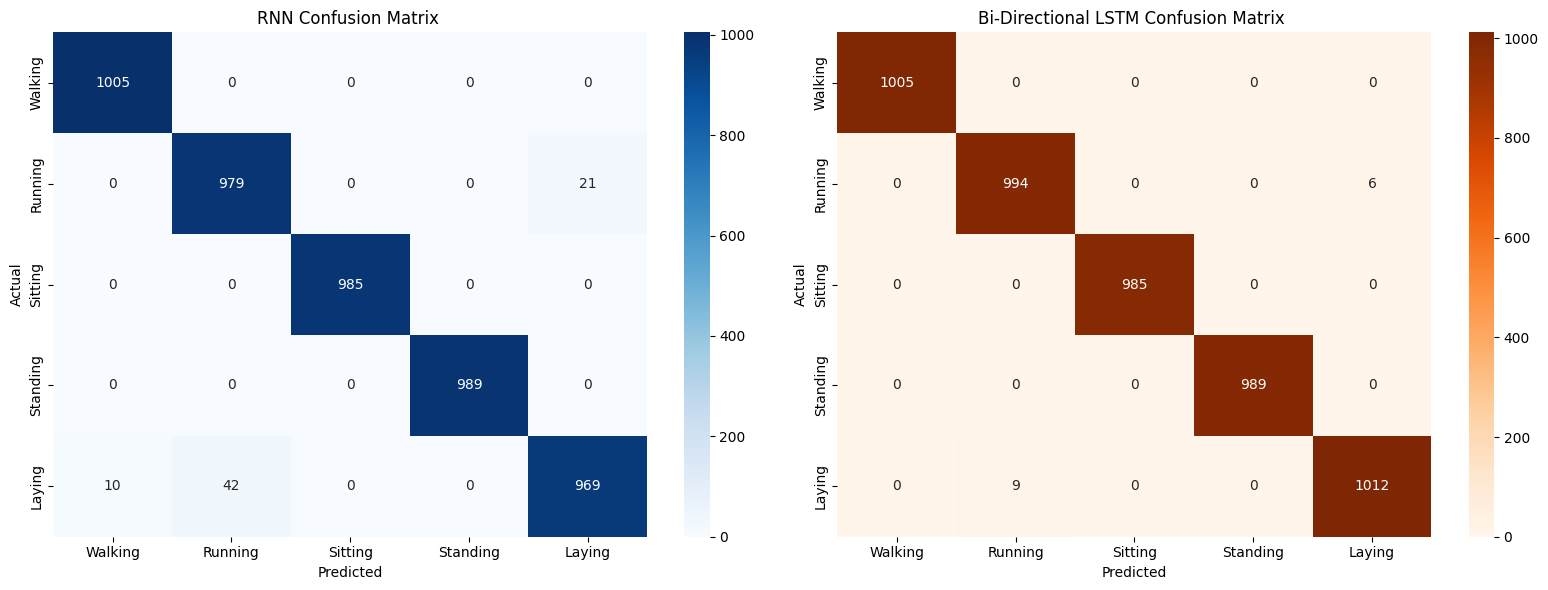

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define labels
ACTIVITIES = ['Walking', 'Running', 'Sitting', 'Standing', 'Laying']
labels = ACTIVITIES

# Confusion matrices (raw counts)
cm_rnn = confusion_matrix(y_true_classes, y_pred_classes_rnn)
cm_lstm = confusion_matrix(y_true_classes, y_pred_classes_lstm)

# Plot raw (non-normalized) confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('RNN Confusion Matrix ')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Bi-Directional LSTM Confusion Matrix ')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
